## CLASSIFY WIHT K-NEAREST NEIGHBOR
Is an algorithm based on a instance of supervised type of MACHINE LEARNING.
Can be used for classify new sampling
K: means the quantity of neighbor points around that are consider nearest

It's a method that only search the nearest observations from the observation that you are trying to predict and classify the interest point based on the mayority of data that surround it

* **Supervised:** means that i have labels in the dataset of training with the class or result expected of a row data

* **Based on instances:** Means that our algorithm not learn explicity a model like(logistic regression or Decision Trees), instead memorize the instances of training that are used like "knowledge base" for the prediction phase.

Where I could apply K-Nearest Neighbor?
for solve problems like:
* Recomendation systems
* Semantic serching
* Anomaly detection

**Advantages and Disadvantages**
* Easy to learn and implement.
* Use all the dataset for train "points" and need to use a lot of memory and resources of processing (CPU)
* Work better with small datasets and without a lot of features(columns)

**How K-NN works?**
* 1.-Calculate the distance between the item to classify and the other part of items from dataset of training
* 2.-Select "K" elements (With less distance of the item of classify)
* 3.-Make a vote of majority between "k points"


Where I could apply K-Nearest Neighboor?

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
df=pd.read_csv('reviews_sentiment.csv', sep=";")
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


In [21]:
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


Whe have 257 registers. the stars round of 1 to 5, the quantity of words go from 1 to 103, the variations of sentiment are between -2.27 to 3.26 with a media of 0.38 and standar desviation of 0.89, with this information we could see that the majority of data are between 0.38-0.89 and 0.38+0.89

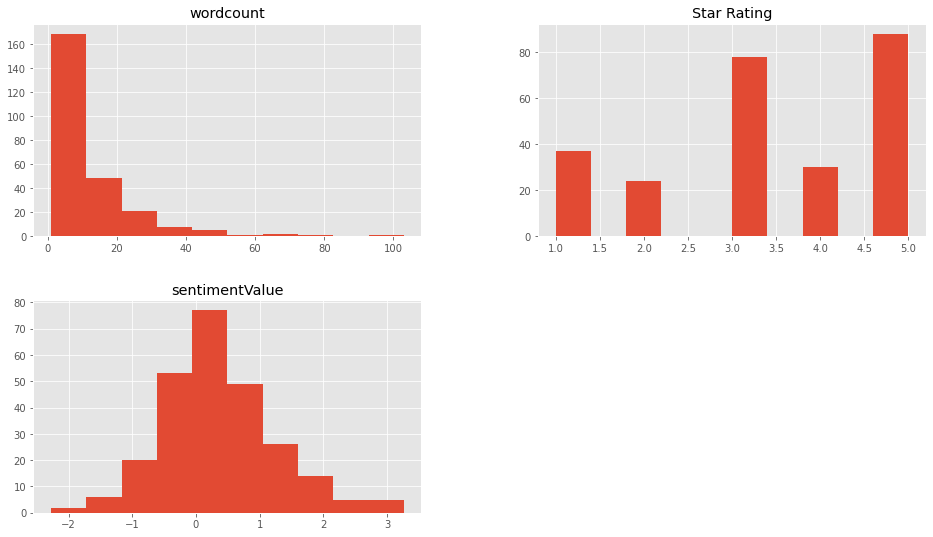

In [26]:
df.hist()
plt.show()

I can see about the graphics that the majority of words are between 0 to 10 and the sentiment Value it's similar like a bell

I want to see abotu the valorations of stars that I have:

In [30]:
print(df.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


with this information I can understand that there are more stars with 3 an 5

C:\Users\ivanp\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ivanp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


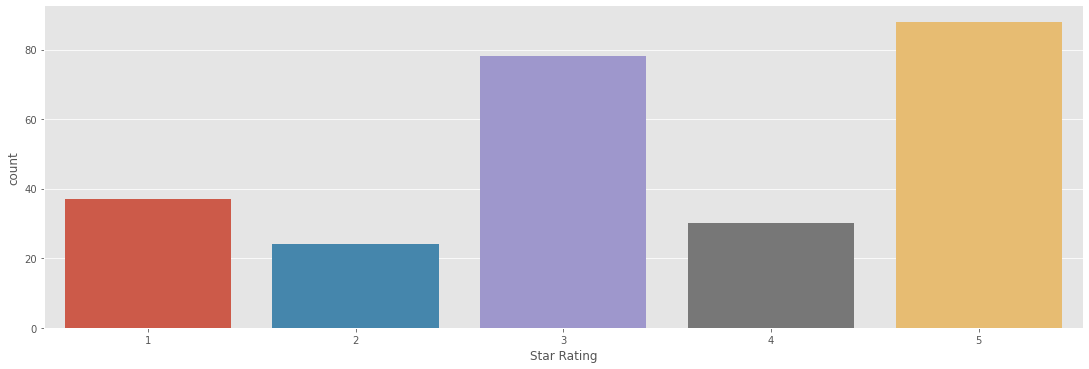

In [32]:
sns.factorplot('Star Rating',data=df,kind="count",aspect=3)

I going to graphic better the quality of word and confirm that the majority are between 1 to 10 words

C:\Users\ivanp\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ivanp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


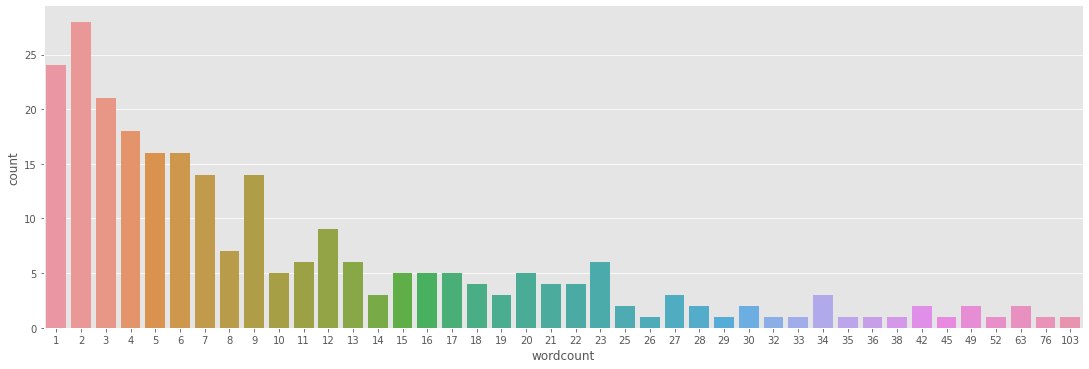

In [38]:
sns.factorplot('wordcount',data=df,kind="count",aspect=3)

## Prepare the INPUTS and train the model

In [39]:
X=df[['wordcount','sentimentValue']].values
y=df['Star Rating'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Define the value K=7 and create the classifier

In [42]:
n_neighbors=7
knn=KNeighborsClassifier(n_neighbors)
knn.fit(X_train,y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train,y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


I have the 90% of Accuracy on the training set and the 86% of Accuracy for the test

## Accuracy Model

In [44]:
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



## Graphic

<ipython-input-56-96aada0d44fe>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


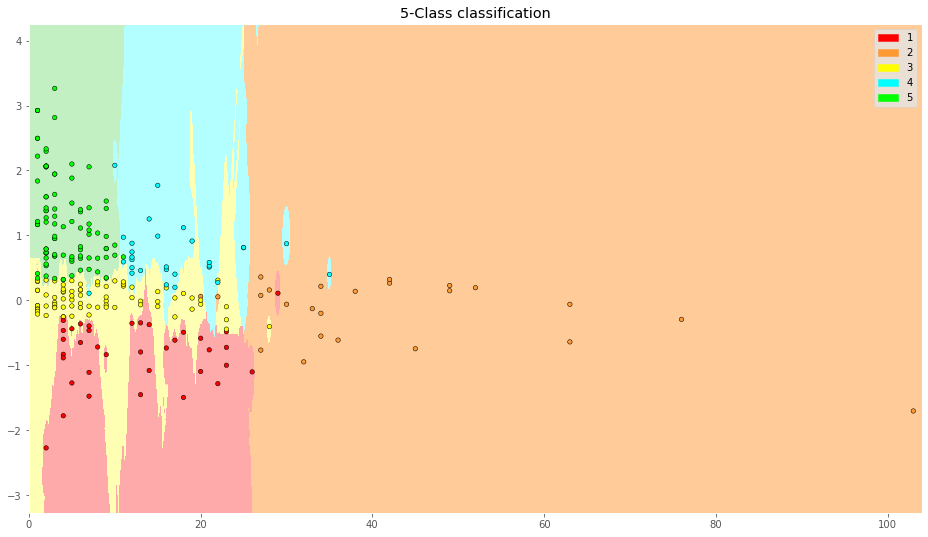

In [56]:
h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
    
plt.title("5-Class classification")
 
plt.show()

The last graphic shows me 5 zones that are related by the quantity of words with the value of sentiment of the review that put the USER.

I could say that 20 words and 1 sentiment give me a valuation of 4(celestial zone)

## Choose the better value for K

([<matplotlib.axis.XTick at 0x1ebda757160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

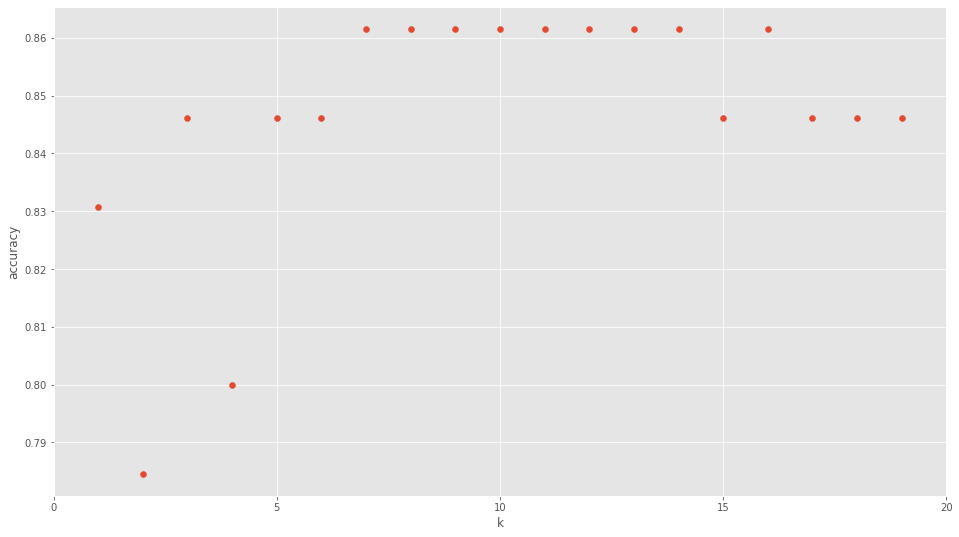

In [57]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## Classify and predict new samples

In [63]:
print(clf.predict([[5, 1.0]]))

[5]


This mean that for 5 words and 1 sentiment the users give us 5 stars

In [67]:
print(clf.predict_proba([[30, 0.0]]))

[[0.04999719 0.86762406 0.024639   0.05773975 0.        ]]


This mean that for coordenates 20,0.0 there are 97% of probability that the users give us 3 stars.

## CONCLUSIONS

In this excercice I create a model in python for process and classify  points of an input group in the algoritm K-Nearest Neighbor.
This algorithm is easy to learn and we need a lot of resourses of memory and cpu for mantain the dataset.
this algorithm isn't good for  a group o big datasets.
